In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1. Reading Data

Data for SBIN is extracted from https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.aspx?flag=0 For period Jan,2011 to Feb,2020

In [37]:
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Courses&Certifications\\Python\\Kaggle\\sbin-stock-data.csv', index_col='Date', parse_dates=['Date'])
data.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2020-02-01,319.90,322.65,296.5,303.15,313.346389,2782488,32711,8.718826e+08,515632.0,18.53,26.15,-16.75
2020-01-31,313.65,321.60,308.7,318.55,316.181359,3580409,32206,1.132059e+09,423766.0,11.84,12.90,4.90
2020-01-30,317.80,317.80,305.7,310.70,311.110236,1328763,17468,4.133918e+08,377324.0,28.40,12.10,-7.10
2020-01-29,317.20,319.70,315.7,316.40,317.784706,738045,7760,2.345394e+08,114028.0,15.45,4.00,-0.80
2020-01-28,318.10,320.05,311.1,314.85,316.421571,937023,9948,2.964943e+08,137811.0,14.71,8.95,-3.25


In [38]:
data = data.sort_index()

In [20]:
data.head()

,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Month,,,,,,,,,,,
2011-01-01,2830.05,2852.45,2468.80,2641.05,15716634,789641,4.117959e+10,2956016,18.81,383.65,-189.0
2011-02-01,2651.90,2813.40,2478.60,2632.00,12435272,574890,3.286879e+10,2606182,20.96,334.80,-19.9
2011-03-01,2651.00,2888.00,2523.55,2767.90,9282295,435532,2.475156e+10,1758984,18.95,364.45,116.9
2011-04-01,2772.00,2959.90,2707.00,2805.60,5965668,317760,1.677361e+10,888753,14.90,252.90,33.6
2011-05-01,2811.50,2819.55,2165.00,2297.80,15309240,769888,3.754678e+10,3322860,21.70,654.55,-513.7


In [39]:
data.dtypes

Open Price                   float64
High Price                   float64
Low Price                    float64
Close Price                  float64
WAP                          float64
No.of Shares                   int64
No. of Trades                  int64
Total Turnover (Rs.)         float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread High-Low              float64
Spread Close-Open            float64
dtype: object

In [40]:
data = data.rename(columns={"No.of Shares":"Volume","No. of Trades":"Trade Volume"})
data.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP', 'Volume',
       'Trade Volume', 'Total Turnover (Rs.)', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open'],
      dtype='object')

### Subsetting the data for useful variables

In [41]:
data = data[['Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume',
       'Trade Volume']]

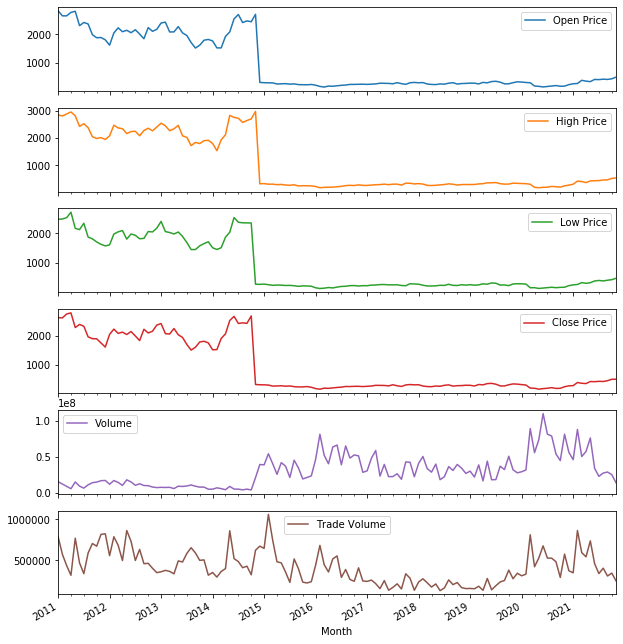

In [26]:
data.plot(subplots=True, figsize=(10,12))
plt.show()

The drastic change in price of the stock from BSE website is due to the split event on 20 Nov 2014(verified from https://moneycontrol.com), in which the face value of SBIN changes from 10 to 1 so BSE(data source) has accouted for that event and scaled the data. we willl scale the data by dividing by 10 to get the actual prices for our analysis.

In [42]:
data["2014-11-19":"2014-11-20"].tail()

,Open Price,High Price,Low Price,Close Price,Volume,Trade Volume
Date,,,,,,
2014-11-19,2950.0,2968.0,2905.10,2911.4,306459,27329
2014-11-20,294.4,298.7,291.05,297.1,2921924,63450


In [43]:
data.shape

(2250, 6)

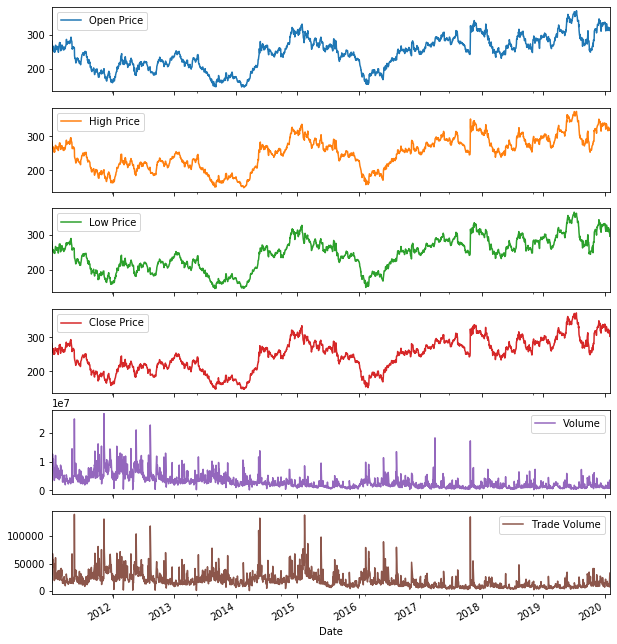

In [44]:
# dividing by 10 to get the actual prices for our analysis.
data['Open Price'][:"2014-11-19"] = data['Open Price'][:"2014-11-19"]/10
data['High Price'][:"2014-11-19"] = data['High Price'][:"2014-11-19"]/10
data['Low Price'][:"2014-11-19"] = data['Low Price'][:"2014-11-19"]/10
data['Close Price'][:"2014-11-19"] = data['Close Price'][:"2014-11-19"]/10
data['Volume'][:"2014-11-19"] = data['Volume'][:"2014-11-19"]*10
data.plot(subplots=True, figsize=(10,12))
plt.show()

In [49]:
data['Open Price'][:"2014-11-19"].tail()

Date
2014-11-13    276.00
2014-11-14    273.00
2014-11-17    279.57
2014-11-18    295.50
2014-11-19    295.00
Name: Open Price, dtype: float64

### Extracting 2 years data for our analysis

We shall perform analysis on both 10 years and 2 years data of SBIN to understand the data and how parameters change with larger data

In [50]:
data_sbin = data['2011-01-03':'2012-12-31']

### 2. Moving Average Plots

#### 2.1 Simple Moving Average

Moving Averages are used for smoothing the time series data. It helps analyse trend of the data

Simple Moving Average of Close Price for 2 years data

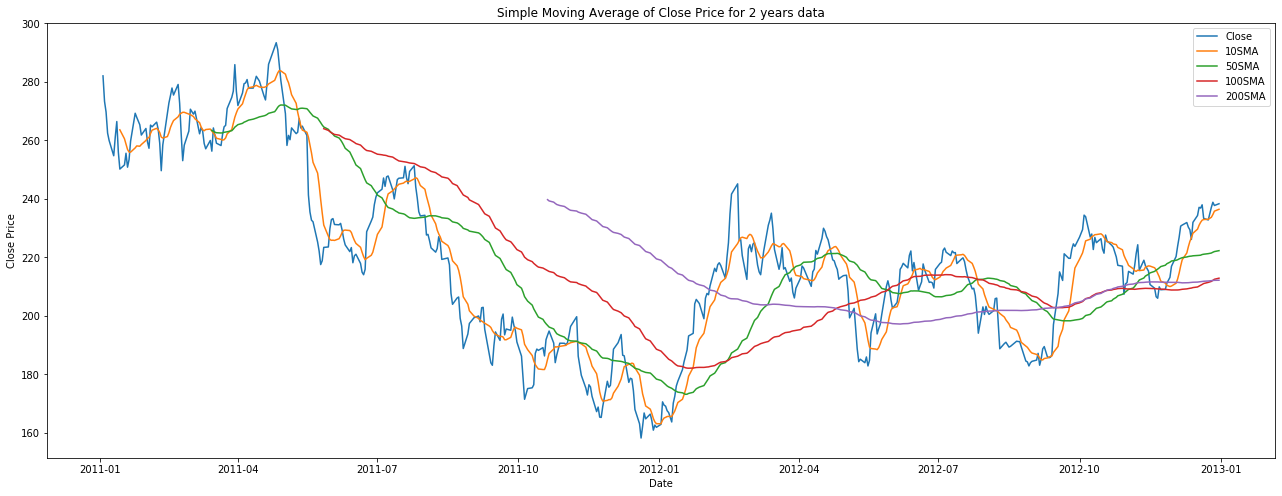

In [51]:
data_sbin['Close 10Day MA'] = data_sbin['Close Price'].rolling(window=10).mean()
data_sbin['Close 50Day MA'] = data_sbin['Close Price'].rolling(window=50).mean()
data_sbin['Close 100Day MA'] = data_sbin['Close Price'].rolling(window=100).mean()
data_sbin['Close 200Day MA'] = data_sbin['Close Price'].rolling(window=200).mean()

plt.figure(figsize=(22,8))
plt.plot(data_sbin['Close Price'], label = 'Close')
plt.plot(data_sbin['Close 10Day MA'], label = '10SMA')
plt.plot(data_sbin['Close 50Day MA'], label = '50SMA')
plt.plot(data_sbin['Close 100Day MA'], label = '100SMA')
plt.plot(data_sbin['Close 200Day MA'], label = '200SMA')
plt.legend(loc='best')
plt.title("Simple Moving Average of Close Price for 2 years data")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

Simple Moving Average of Close Price for 10 years data

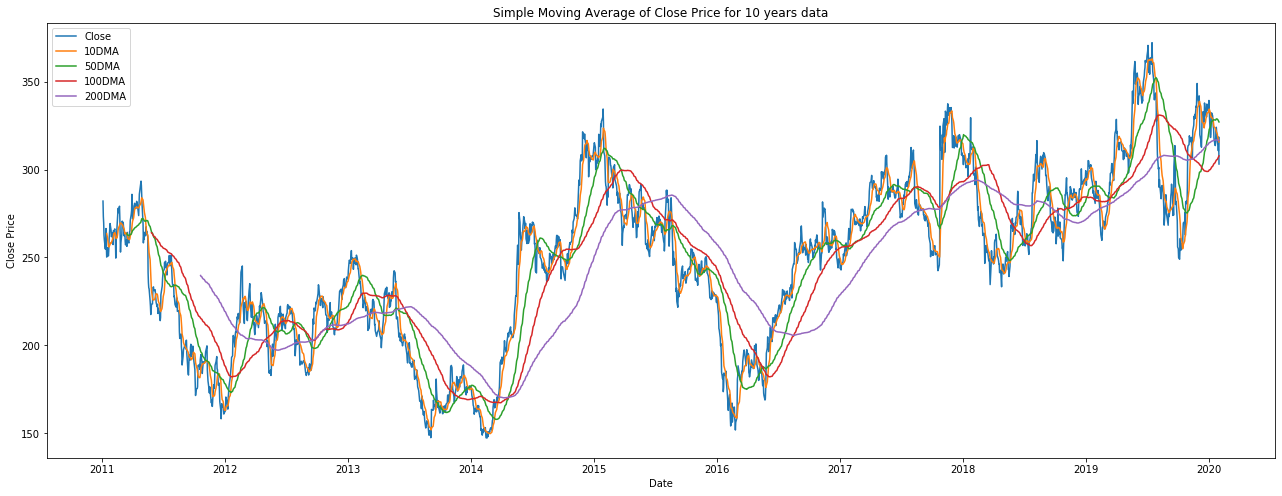

In [52]:
data['Close 10Day MA'] = data['Close Price'].rolling(window=10).mean()
data['Close 50Day MA'] = data['Close Price'].rolling(window=50).mean()
data['Close 100Day MA'] = data['Close Price'].rolling(window=100).mean()
data['Close 200Day MA'] = data['Close Price'].rolling(window=200).mean()

plt.figure(figsize=(22,8))
plt.plot(data['Close Price'], label = 'Close')
plt.plot(data['Close 10Day MA'], label = '10DMA')
plt.plot(data['Close 50Day MA'], label = '50DMA')
plt.plot(data['Close 100Day MA'], label = '100DMA')
plt.plot(data['Close 200Day MA'], label = '200DMA')
plt.legend(loc='best')
plt.title("Simple Moving Average of Close Price for 10 years data")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

In both the graphs, it is observer 10 Days Moving Average(DMA) fits best on the data detailing small variations, larger moving averages 100 and 200 gives better view of long term trend whereas smaller moving averages 10 and 50 give granular details for short term data.

#### 2.2 Exponential Moving Average

Exponential moving averages is aother way to understand trend of the stock price over time, EMA is weighted moving averaging technique that gives more weight to the recent data.

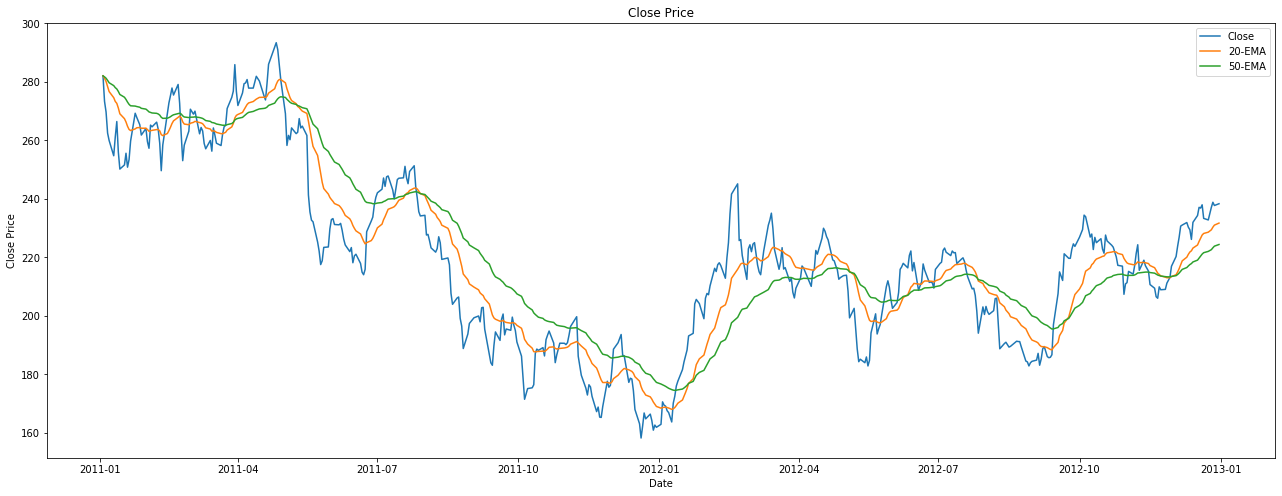

In [53]:
# ewm - Provide exponential weighted (EW) functions
data_sbin['Close 20-trday EMA'] = data_sbin['Close Price'].ewm(span=20,adjust=False).mean()
data_sbin['Close 50-trday EMA'] = data_sbin['Close Price'].ewm(span=50,adjust=False).mean()
plt.figure(figsize=(22,8))
plt.plot(data_sbin['Close Price'], label = 'Close')
plt.plot(data_sbin['Close 20-trday EMA'], label = '20-EMA')
plt.plot(data_sbin['Close 50-trday EMA'], label = '50-EMA')
plt.legend(loc='best')
plt.title("Close Price")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

Like simple moving average,smaller period, 20 day EMA fits the data better than 50-EMA.

Combination of moving averages can be used to underastand trend of the data more accurately.

### 3. Lagged Time Series Plot

For stock prediction, past data is used to predict the future data of the stock, the time series is lagged by a period which can be taken as future values of the prices.

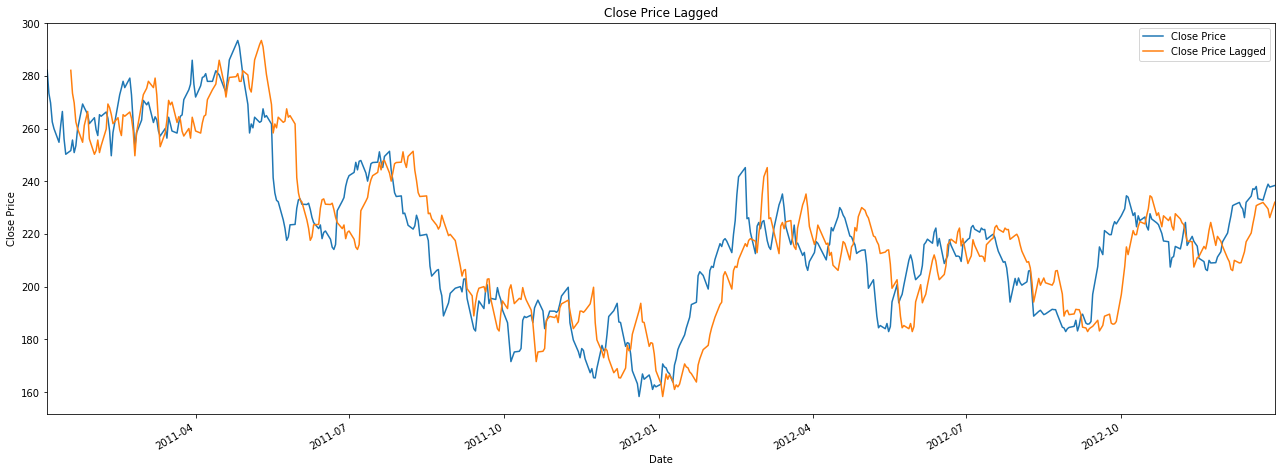

In [54]:
# referred https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook#Aim
# Shift() index by desired number of periods with an optional time freq.
plt.figure(figsize=(22,8))
data_sbin["Close Price"].plot(legend=True)
shifted = data_sbin["Close Price"].shift(10).plot(legend=True)
shifted.legend(['Close Price','Close Price Lagged'])
plt.title("Close Price Lagged")
plt.ylabel('Close Price')
plt.show()

Here, the relation between prices and its past values can be observed at a given time t,Here we can see that the two plots are following the same trend for over most of time and at very few points are in reverse trend, this is further analysed using autocorrelation and finding correlation at different instances.

### 4. Auto-correlation and Partial Auto-correlation of SBIN Close Price

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

The autorrelation will give us further information till how many lags the close price is significatanly correlated to its past data.

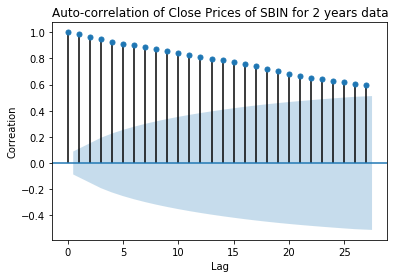

In [56]:
plot_acf(data_sbin['Close Price'])
plt.xlabel("Lag")
plt.ylabel("Correation")
plt.title("Auto-correlation of Close Prices of SBIN for 2 years data")
plt.show()

The series is significantly correlated for 25 lags.

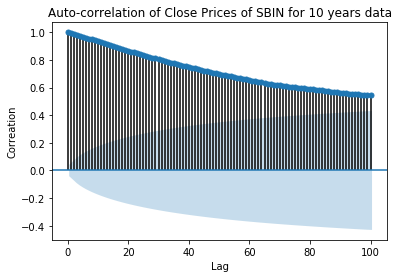

In [57]:
plot_acf(data['Close Price'], lags=100)
plt.xlabel("Lag")
plt.ylabel("Correation")
plt.title("Auto-correlation of Close Prices of SBIN for 10 years data")
plt.show()